In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bureau = pd.read_csv('../raw-data/dseb63_bureau.csv')
bureau.head()

,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,SK_ID_CURR
0,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN,254629
1,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN,254629
2,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN,254629
3,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN,254629
4,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN,254629


In [3]:
bureau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465325 entries, 0 to 1465324
Data columns (total 17 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   SK_ID_BUREAU            1465325 non-null  int64  
 1   CREDIT_ACTIVE           1465325 non-null  object 
 2   CREDIT_CURRENCY         1465325 non-null  object 
 3   DAYS_CREDIT             1465325 non-null  int64  
 4   CREDIT_DAY_OVERDUE      1465325 non-null  int64  
 5   DAYS_CREDIT_ENDDATE     1376227 non-null  float64
 6   DAYS_ENDDATE_FACT       920652 non-null   float64
 7   AMT_CREDIT_MAX_OVERDUE  516780 non-null   float64
 8   CNT_CREDIT_PROLONG      1465325 non-null  int64  
 9   AMT_CREDIT_SUM          1465322 non-null  float64
 10  AMT_CREDIT_SUM_DEBT     1242231 non-null  float64
 11  AMT_CREDIT_SUM_LIMIT    975655 non-null   float64
 12  AMT_CREDIT_SUM_OVERDUE  1465325 non-null  float64
 13  CREDIT_TYPE             1465325 non-null  object 
 14  DA

In [21]:
bureau['TARGET'].value_counts(normalize=True, dropna=False)

TARGET
0.0    0.738141
NaN    0.199237
1.0    0.062622
Name: proportion, dtype: float64

In [6]:
for col in bureau.select_dtypes('object').columns:
    bureau[col] = bureau[col].astype('category')
    print(col, bureau[col].unique())

CREDIT_ACTIVE ['Closed', 'Active', 'Sold', 'Bad debt']
Categories (4, object): ['Active', 'Bad debt', 'Closed', 'Sold']
CREDIT_CURRENCY ['currency 1', 'currency 2', 'currency 4', 'currency 3']
Categories (4, object): ['currency 1', 'currency 2', 'currency 3', 'currency 4']
CREDIT_TYPE ['Consumer credit', 'Credit card', 'Car loan', 'Mortgage', 'Microloan', ..., 'Loan for the purchase of equipment', 'Cash loan (non-earmarked)', 'Mobile operator loan', 'Interbank credit', 'Loan for purchase of shares (margin lending)']
Length: 15
Categories (15, object): ['Another type of loan', 'Car loan', 'Cash loan (non-earmarked)', 'Consumer credit', ..., 'Mobile operator loan', 'Mortgage', 'Real estate loan', 'Unknown type of loan']


In [20]:
bureau[bureau['CREDIT_ACTIVE']=='Bad debt']

,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,SK_ID_CURR
6684,5723864,Bad debt,currency 1,-986,0,NaN,NaN,184500.000,0,184500.00,0.000,0.000,0.00,Credit card,-22,NaN,8544
29866,5801236,Bad debt,currency 1,-2627,0,-1529.0,-1502.0,127866.915,0,225000.00,115349.715,-25349.715,0.00,Credit card,-1502,NaN,106615
67049,5246470,Bad debt,currency 1,-2386,26,-2296.0,NaN,53532.000,1,58059.00,NaN,NaN,53532.00,Consumer credit,-2296,NaN,219076
113214,5600466,Bad debt,currency 1,-1046,366,52.0,NaN,NaN,0,135000.00,176233.500,NaN,176233.50,Credit card,-63,NaN,301057
358515,5173404,Bad debt,currency 1,-2740,1761,-2558.0,NaN,2137.500,0,14296.50,7717.500,0.000,7717.50,Consumer credit,-888,NaN,90732
464110,5997537,Bad debt,currency 1,-1502,366,-1292.0,NaN,NaN,0,57960.00,0.000,NaN,0.00,Consumer credit,-1292,NaN,128551
473135,6039562,Bad debt,currency 1,-1683,366,-862.0,NaN,NaN,0,528165.00,NaN,NaN,503392.50,Consumer credit,-1217,NaN,69469
545313,5499851,Bad debt,currency 1,-1218,366,-852.0,NaN,NaN,0,121275.00,0.000,NaN,0.00,Consumer credit,-1035,NaN,68550
608323,6439586,Bad debt,currency 1,-2830,0,-2434.0,-1781.0,21741.615,0,58567.68,0.000,0.000,0.00,Consumer credit,-1781,NaN,158804
608558,6446445,Bad debt,currency 1,-2493,366,-898.0,NaN,NaN,0,162000.00,NaN,NaN,17541.00,Credit card,-1449,NaN,69053


In [9]:
bureau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465325 entries, 0 to 1465324
Data columns (total 17 columns):
 #   Column                  Non-Null Count    Dtype   
---  ------                  --------------    -----   
 0   SK_ID_BUREAU            1465325 non-null  int64   
 1   CREDIT_ACTIVE           1465325 non-null  category
 2   CREDIT_CURRENCY         1465325 non-null  category
 3   DAYS_CREDIT             1465325 non-null  int64   
 4   CREDIT_DAY_OVERDUE      1465325 non-null  int64   
 5   DAYS_CREDIT_ENDDATE     1376227 non-null  float64 
 6   DAYS_ENDDATE_FACT       920652 non-null   float64 
 7   AMT_CREDIT_MAX_OVERDUE  516780 non-null   float64 
 8   CNT_CREDIT_PROLONG      1465325 non-null  int64   
 9   AMT_CREDIT_SUM          1465322 non-null  float64 
 10  AMT_CREDIT_SUM_DEBT     1242231 non-null  float64 
 11  AMT_CREDIT_SUM_LIMIT    975655 non-null   float64 
 12  AMT_CREDIT_SUM_OVERDUE  1465325 non-null  float64 
 13  CREDIT_TYPE             1465325 non-null  

In [13]:
def count_bad_debt(x):
    return x[x == 'Bad debt'].shape[0]

bureau_agg = bureau.groupby('SK_ID_BUREAU').agg({
    'SK_ID_CURR': 'first',
    'CREDIT_ACTIVE': ['count', count_bad_debt],
    'CREDIT_CURRENCY': 'nunique',
    'DAYS_CREDIT': ['min', 'max', 'mean'],
    'CREDIT_DAY_OVERDUE': ['min', 'max', 'mean'],
    'DAYS_CREDIT_ENDDATE': ['min', 'max', 'mean'],
    'DAYS_ENDDATE_FACT': ['min', 'max', 'mean'],
    'AMT_CREDIT_MAX_OVERDUE': ['min', 'max', 'mean'],
    'CNT_CREDIT_PROLONG': ['min', 'max', 'mean'],
    'AMT_CREDIT_SUM': ['min', 'max', 'mean'],
    'AMT_CREDIT_SUM_DEBT': ['min', 'max', 'mean'],
    'AMT_CREDIT_SUM_LIMIT': ['min', 'max', 'mean'],
    'AMT_CREDIT_SUM_OVERDUE': ['min', 'max', 'mean'],
    'DAYS_CREDIT_UPDATE': ['min', 'max', 'mean'],
    'AMT_ANNUITY': ['min', 'max', 'mean']
})

bureau_agg.columns = ['_'.join(col).strip() for col in bureau_agg.columns.values]
bureau_agg = bureau_agg.reset_index()
bureau_agg.head()

,SK_ID_BUREAU,SK_ID_CURR_first,CREDIT_ACTIVE_count,CREDIT_ACTIVE_count_bad_debt,CREDIT_CURRENCY_nunique,DAYS_CREDIT_min,DAYS_CREDIT_max,DAYS_CREDIT_mean,CREDIT_DAY_OVERDUE_min,CREDIT_DAY_OVERDUE_max,...,AMT_CREDIT_SUM_LIMIT_mean,AMT_CREDIT_SUM_OVERDUE_min,AMT_CREDIT_SUM_OVERDUE_max,AMT_CREDIT_SUM_OVERDUE_mean,DAYS_CREDIT_UPDATE_min,DAYS_CREDIT_UPDATE_max,DAYS_CREDIT_UPDATE_mean,AMT_ANNUITY_min,AMT_ANNUITY_max,AMT_ANNUITY_mean
0,5000000,300027,1,0,1,-2918,-2918,-2918.0,0,0,...,NaN,0.0,0.0,0.0,-2512,-2512,-2512.0,NaN,NaN,NaN
1,5000001,300027,1,0,1,-1015,-1015,-1015.0,0,0,...,0.0,0.0,0.0,0.0,-891,-891,-891.0,NaN,NaN,NaN
2,5000002,300027,1,0,1,-149,-149,-149.0,0,0,...,0.0,0.0,0.0,0.0,-23,-23,-23.0,NaN,NaN,NaN
3,5000003,300027,1,0,1,-135,-135,-135.0,0,0,...,0.0,0.0,0.0,0.0,-42,-42,-42.0,NaN,NaN,NaN
4,5000004,300027,1,0,1,-47,-47,-47.0,0,0,...,0.0,0.0,0.0,0.0,-17,-17,-17.0,NaN,NaN,NaN


In [18]:
bureau_agg['CREDIT_ACTIVE_count_bad_debt'].unique()

array([0, 1])

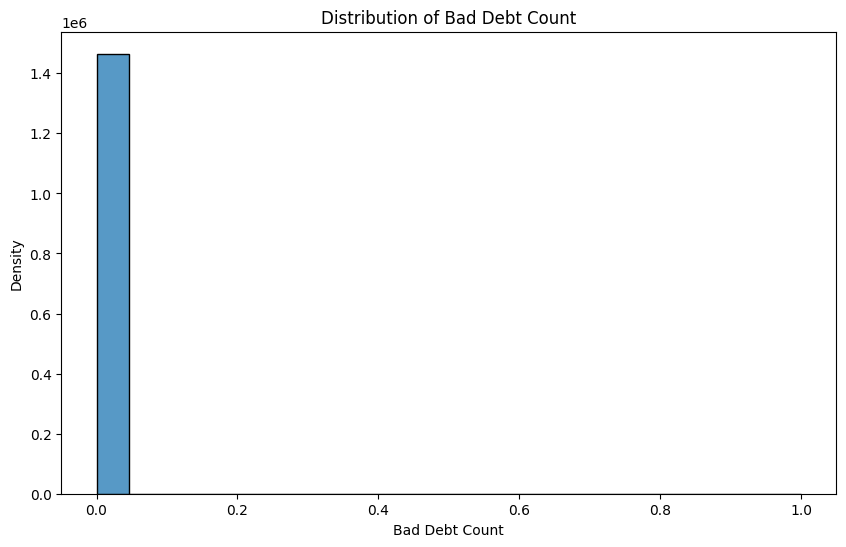

In [15]:
# plot the distribution of CREDIT_ACTIVE_count_bad_debt
plt.figure(figsize=(10, 6))
sns.histplot(bureau_agg['CREDIT_ACTIVE_count_bad_debt'])
plt.title('Distribution of Bad Debt Count')
plt.xlabel('Bad Debt Count')
plt.ylabel('Density')
plt.show()